In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np 
from numpy.linalg import eig

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/PCA/Finance_data.csv')  # Replace with your file path
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [ ]:
#Selecting Features

In [4]:
features = df[[#'gender', 
    'age', 
    #'Investment_Avenues', 'Mutual_Funds', 
    'Equity_Market',
      # 
    'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       #'Stock_Marktet', 'Factor', 'Objective', 
    'Purpose', 'Duration']]
      # 'Invest_Monitor', 'Expect', 'Avenue',
      # 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       #'Reason_Bonds', 'Reason_FD', 'Source']

In [ ]:
#   Encoding categorical

In [7]:
from sklearn.preprocessing import LabelEncoder

# Make an explicit copy to avoid chained assignment issues
features = features.copy()

le = LabelEncoder()

features['Purpose'] = le.fit_transform(features['Purpose'])
features['Duration'] = le.fit_transform(features['Duration'])


In [8]:
#Applying PCA

In [9]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

In [10]:
pca = PCA()
principal_components = pca.fit_transform(standardized_features)

# Analyze the principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

In [11]:
pca = PCA()
principal_components = pca.fit_transform(standardized_features)

# Analyze the principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

In [ ]:
#Visualization 

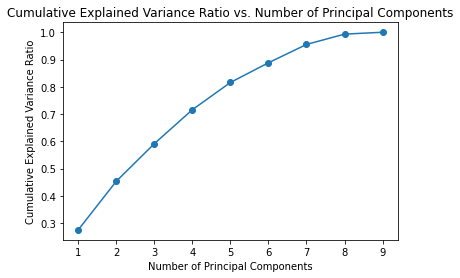

In [16]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [12]:
threshold = 0.95
num_components_to_retain = len(cumulative_variance_ratio[cumulative_variance_ratio <= threshold])

In [14]:
transformed_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,1.568264,0.956929,3.202832,-0.212760,-0.439043,-0.720227
1,5.316028,-0.252593,-1.564102,-0.172448,0.375886,-0.866564
2,1.046430,2.713902,-1.779911,-1.060066,-0.034004,0.111614
3,2.577070,-3.043765,1.241836,-0.894864,0.815512,-1.281094
4,2.928871,-2.753029,-0.060599,0.535081,-0.224010,-0.998627


In [15]:
loadings = pca.components_[:6, :]
loadings_df = pd.DataFrame(loadings, columns=features.columns)
print("Loadings of Features on Principal Components:")
print(loadings_df)

Loadings of Features on Principal Components:
        age  Equity_Market  Debentures  Government_Bonds  Fixed_Deposits  \
0 -0.276684      -0.182342   -0.536744         -0.370603        0.357103   
1  0.471905       0.463624   -0.099657         -0.548057        0.295814   
2  0.096823      -0.495655    0.040786          0.068345        0.442578   
3  0.215668      -0.206513    0.109730          0.031641       -0.385773   
4 -0.166211       0.417723   -0.317337          0.180584       -0.201199   
5 -0.576508       0.247265   -0.099132         -0.143962       -0.194090   

        PPF      Gold   Purpose  Duration  
0  0.439540  0.203866 -0.027416  0.318946  
1 -0.217353  0.049281 -0.261419 -0.215742  
2  0.159207 -0.512506 -0.214063 -0.457066  
3  0.355017  0.379366 -0.688709 -0.068557  
4  0.085029 -0.616274 -0.425978  0.235810  
5  0.119594  0.118395  0.029523 -0.713501  


In [ ]:
# PC1 (Principal Component 1): Interpretation: PC1 has high positive loadings for 'PPF', 'Gold', and 'Fixed_Deposits'. It has negative loadings for 'age', 'Debentures', 'Government_Bonds', and 'Purpose'.

# Potential Interpretation: PC1 might represent a combination of investments in 'PPF', 'Gold', and 'Fixed_Deposits' with a negative association with 'age', 'Debentures', 'Government_Bonds', and 'Purpose'.

# PC2 (Principal Component 2): Interpretation: PC2 has high positive loadings for 'age', 'Equity_Market', and 'Debentures'. It has negative loadings for 'Government_Bonds', 'Fixed_Deposits', 'Gold', and 'Purpose'.

# Potential Interpretation: PC2 might represent a combination of age-related factors, investments in 'Equity_Market' and 'Debentures', with a negative association with 'Government_Bonds', 'Fixed_Deposits', 'Gold', and 'Purpose'.

# PC3 to PC6: Similar interpretations can be made for PC3 to PC6, with each representing specific combinations of features.